In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
random_state=42
cv=5
scoring='roc_auc'
verbose=2

In [3]:
df=pd.read_csv('df_24.csv')
y=pd.read_csv('y.csv')
df.columns

Index(['Age', 'DailyRate', 'Department', 'JobInvolvement', 'JobLevel',
       'MaritalStatus', 'MonthlyIncome', 'OverTime', 'NumCompaniesWorked',
       'JobRole_Healthcare Representative', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Sales Representative',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Satisfaction', 'Salary', 'YearsAt'],
      dtype='object')

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.25,random_state=42)

In [5]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
random_state=42
cv=5
scoring='roc_auc'
verbose=2

Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


C_val = uniform(loc=0, scale=4)
lr=LogisticRegression(verbose=verbose,random_state=random_state,class_weight='balanced',max_iter=500,n_jobs=-1)
parameters={'C':C_val}
clf=RandomizedSearchCV(lr,parameters,verbose=verbose,cv=cv,random_state=random_state,scoring=scoring,n_iter=100,n_jobs=-1)
best_model=clf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [7]:
y_pred=best_model.predict(X_test)
test_acc_lr=accuracy_score(y_test,y_pred)*100
auc_roc_lr = roc_auc_score(y_test,y_pred)
test_acc_lr,auc_roc_lr

(70.92391304347827, 0.6734375)

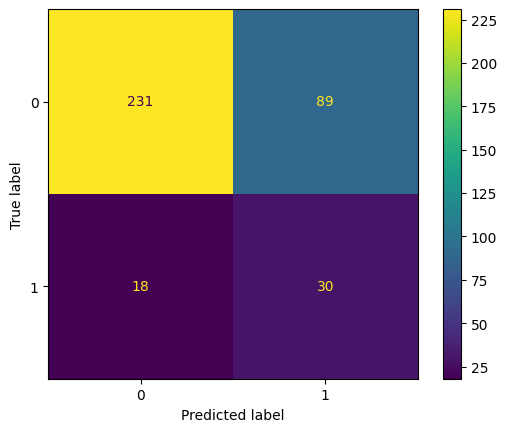

In [8]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model.classes_)
disp.plot()
plt.show()

KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=-1)
from sklearn.model_selection import RandomizedSearchCV
k_range=np.arange(1,100,5)
param_grid=dict(n_neighbors=k_range)
grid=RandomizedSearchCV(knn,param_grid,cv=cv,random_state=random_state,scoring=scoring,verbose=verbose)
grid_serch=grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s


C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: 

[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=86; total time=   0.0s
[CV] END .....................................n_neighbors=76; total time=   0.0s
[CV] END .....................................n_neighbors=76; total time=   0.0s
[CV] END .....................................n_neighbors=76; total time=   0.0s
[CV] END .....................................n_neighbors=76; total time=   0.0s
[CV] END .....................................n_neighbors=76; total time=   0.0s
[CV] END ...................

C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: 

[CV] END ......................................n_neighbors=6; total time=   0.0s
[CV] END ......................................n_neighbors=6; total time=   0.0s
[CV] END ......................................n_neighbors=6; total time=   0.0s
[CV] END .....................................n_neighbors=41; total time=   0.0s
[CV] END .....................................n_neighbors=41; total time=   0.0s
[CV] END .....................................n_neighbors=41; total time=   0.0s
[CV] END .....................................n_neighbors=41; total time=   0.0s
[CV] END .....................................n_neighbors=41; total time=   0.0s
[CV] END .....................................n_neighbors=26; total time=   0.0s
[CV] END .....................................n_neighbors=26; total time=   0.0s
[CV] END .....................................n_neighbors=26; total time=   0.0s
[CV] END .....................................n_neighbors=26; total time=   0.0s
[CV] END ...................

C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: 

[CV] END .....................................n_neighbors=56; total time=   0.0s
[CV] END .....................................n_neighbors=56; total time=   0.0s
[CV] END .....................................n_neighbors=56; total time=   0.0s
[CV] END .....................................n_neighbors=56; total time=   0.0s
[CV] END .....................................n_neighbors=56; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=16; total time=   0.0s
[CV] END .....................................n_neighbors=91; total time=   0.0s
[CV] END .....................................n_neighbors=91; total time=   0.0s


C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: 

[CV] END .....................................n_neighbors=91; total time=   0.0s
[CV] END .....................................n_neighbors=91; total time=   0.0s
[CV] END .....................................n_neighbors=91; total time=   0.0s
[CV] END .....................................n_neighbors=81; total time=   0.0s
[CV] END .....................................n_neighbors=81; total time=   0.0s
[CV] END .....................................n_neighbors=81; total time=   0.0s
[CV] END .....................................n_neighbors=81; total time=   0.0s
[CV] END .....................................n_neighbors=81; total time=   0.0s


C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: 

In [10]:
grid_serch.best_params_

{'n_neighbors': 86}

In [11]:
y_pred=grid_serch.predict(X_test)
test_acc_knn=accuracy_score(y_test,y_pred)*100
auc_roc_knn = roc_auc_score(y_test,y_pred)
test_acc_knn,auc_roc_knn

(86.95652173913044, 0.5)

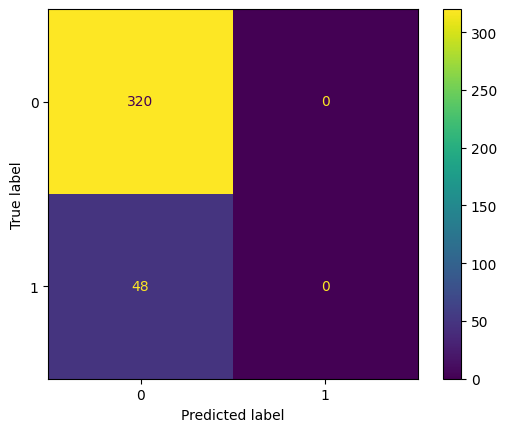

In [12]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_serch.classes_)
disp.plot()
plt.show()

Decision Tree

In [24]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [25]:
param_dist = {"max_depth": [3, None],"max_features": randint(1, 9),"min_samples_leaf": randint(1, 9),"criterion": ["gini", "entropy"]}

In [26]:
tree = DecisionTreeClassifier()
clf=RandomizedSearchCV(tree, param_dist,verbose=verbose,cv=cv,random_state=random_state,scoring=scoring,n_iter=100,n_jobs=-1)
best_model=clf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [27]:
best_model.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 5}

In [28]:
y_pred=best_model.predict(X_test)
test_acc_dt=accuracy_score(y_test,y_pred)*100
auc_roc_dt = roc_auc_score(y_test,y_pred)
test_acc_dt,roc_auc_dt

(83.15217391304348, 0.5130208333333334)

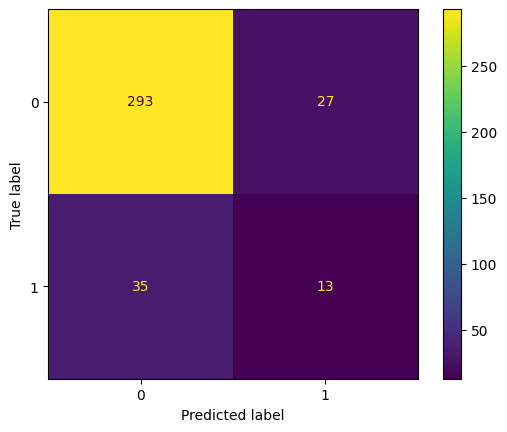

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model.classes_)
disp.plot()
plt.show()

random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': np.arange(10, 500, 10),
    'max_depth': np.arange(1, 20),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier(random_state=random_state, class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=100, cv=cv, verbose=verbose, random_state=random_state, n_jobs=-1, scoring=scoring)
best_model = clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [31]:
best_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 9,
 'bootstrap': True}

In [35]:
y_pred=best_model.predict(X_test)
test_acc_rf=accuracy_score(y_test,y_pred)*100
auc_roc_rf= roc_auc_score(y_test,y_pred)
test_acc_rf,roc_auc_rf

(83.96739130434783, 0.5890625)

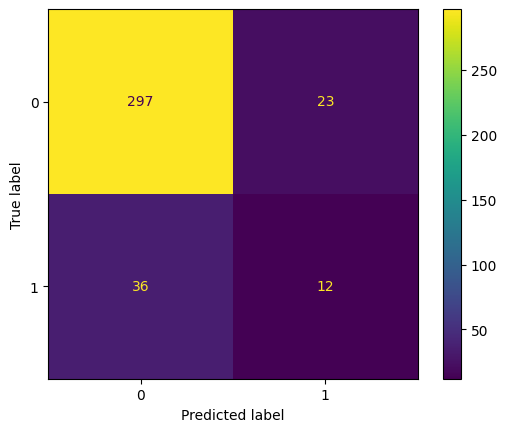

In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_model.classes_)
disp.plot()
plt.show()

In [37]:
from prettytable import PrettyTable
x = PrettyTable(['Model', 'Accuracy', 'ROC_AUC'])
x.add_row(['Logistic Regresstion', round(test_acc_lr,5), round(auc_roc_lr,5)])
x.add_row(['KNN', round(test_acc_knn,5), round(auc_roc_knn,5)])
x.add_row(['Decision Tree', round(test_acc_dt,5), round(auc_roc_dt,5)])
x.add_row(['Random Forest', round(test_acc_rf,5), round(auc_roc_rf,5)])
print(x)

+----------------------+----------+---------+
|        Model         | Accuracy | ROC_AUC |
+----------------------+----------+---------+
| Logistic Regresstion | 70.92391 | 0.67344 |
|         KNN          | 86.95652 |   0.5   |
|    Decision Tree     | 83.15217 | 0.59323 |
|    Random Forest     | 83.96739 | 0.58906 |
+----------------------+----------+---------+
